# Ejercicio 6: Visualización
_Felipe Andres Castillo_

En teoría de grafos, un **grafo geométrico aleatorio (GGA)** es una de las redes espaciales más simples. Se construye ubicando aleatoriamente $N$ nodos en un espacio métrico, de acuerdo con una distribución de probabilidad específica, y conectando dos nodos mediante una arista si, y solo si, la distancia entre ellos es menor que un parámetro $r$.

De esta forma, los parámetros $r$ y $N$ caracterizan completamente a un GGA. Estos grafos son no dirigidos, lo que significa que las aristas no tienen un sentido definido; en otras palabras, no hay una dirección que vaya de un nodo a otro. Las aristas se representan como líneas sin extremos con flechas.

In [1]:
using Pkg
#Pkg.add("Graphs")
#Pkg.add("Distances")
using Graphs
using Distances
using Random
using CairoMakie

In [2]:
# 1) Generación de N nodos (posiciones)
function random_geometric_graph(n::Int, r::Float64, dim::Int=2)
    # Generar posiciones aleatorias para los nodos en un cubo unitario
    positions = rand(n, dim)
    # Crear un grafo vacío con n nodos
    graph = SimpleGraph(n)
    # Agregar aristas entre nodos cuya distancia esté dentro del radio r
    for i in 1:n
        for j in i+1:n
            if euclidean(positions[i, :], positions[j, :]) <= r
                add_edge!(graph, i, j)
            end
        end
    end
    return graph, positions
end

random_geometric_graph (generic function with 2 methods)

In [3]:
# 2) Encontrar el nodo más cercano al centro del cubo unitario
function find_center(positions)
    dmin = 1
    ncenter = 0
    for n in 1:size(positions,1)
        # Calculo de la distancia del n-nodo al centro
        d = euclidean(positions[n, :], [0.5,0.5])
        if d < dmin
            dmin = d
            ncenter = n
        end
    end
    return positions[ncenter,:]
end

find_center (generic function with 1 method)

In [4]:
# 3) Gráfica
function plot_graph(N::Int, r::Float64)
    # Paso 1
    graph, positions = random_geometric_graph(N,r)
    # Paso 2
    node_center = find_center(positions)
    distances = [euclidean(positions[i, :], node_center) for i in 1:size(positions, 1)]
    # Paso 3: graficar
    fig = Figure()
    ax = Axis(fig[1,1],  title = "Random Geometric Graph (N = $(N), r = $(r))",  aspect = DataAspect())
    # Aristas
    for edge in edges(graph)
        i, j = src(edge), dst(edge)
        lines!([positions[i, 1], positions[j, 1]], [positions[i, 2], positions[j, 2]], color = (:black, 0.5), linewidth = 0.5)
    end
    # Nodos
    scatter!(ax, positions, color = distances, colormap = :thermal)
    return fig
end

plot_graph (generic function with 1 method)

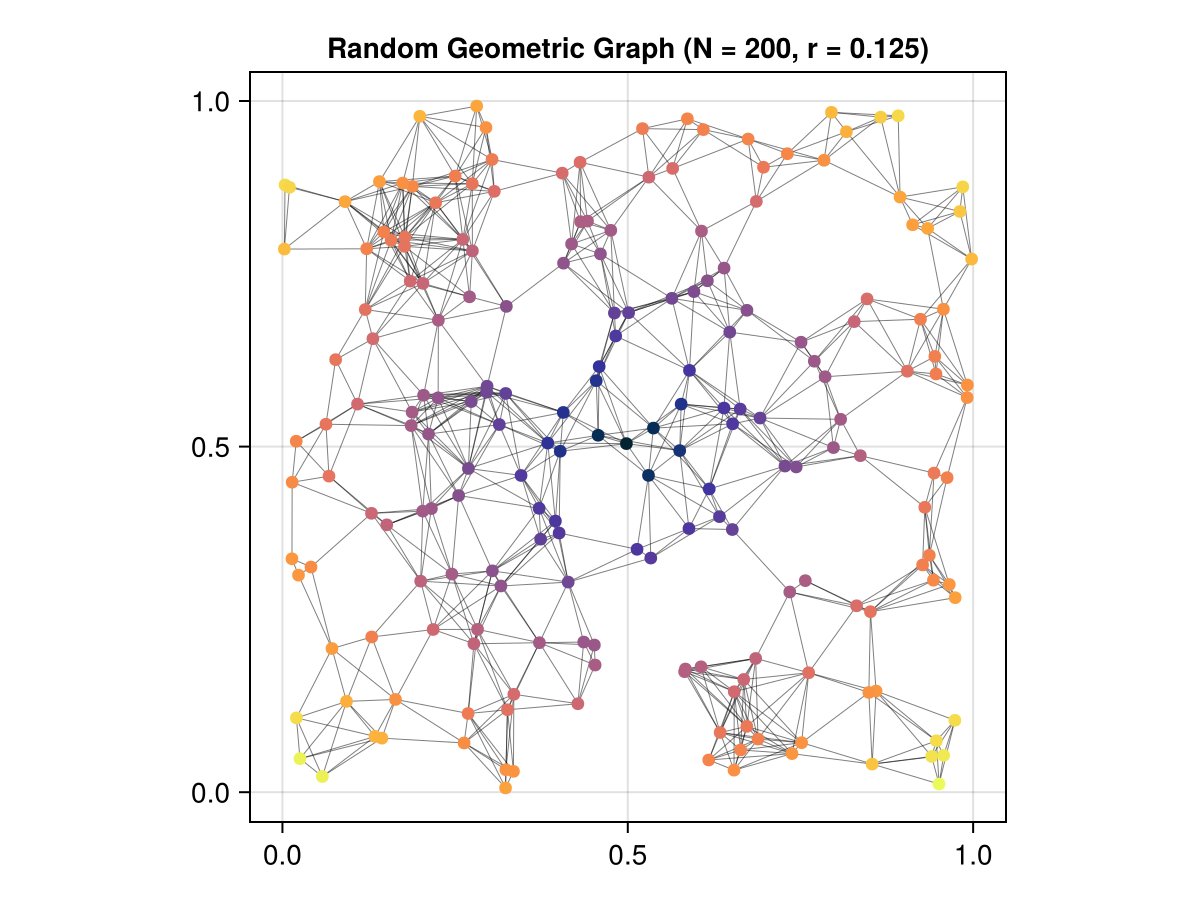

In [5]:
Random.seed!(18)
plot1 = plot_graph(200,0.125)

In [6]:
save("./../fig/RGG_1.png", plot1)

CairoMakie.Screen{IMAGE}


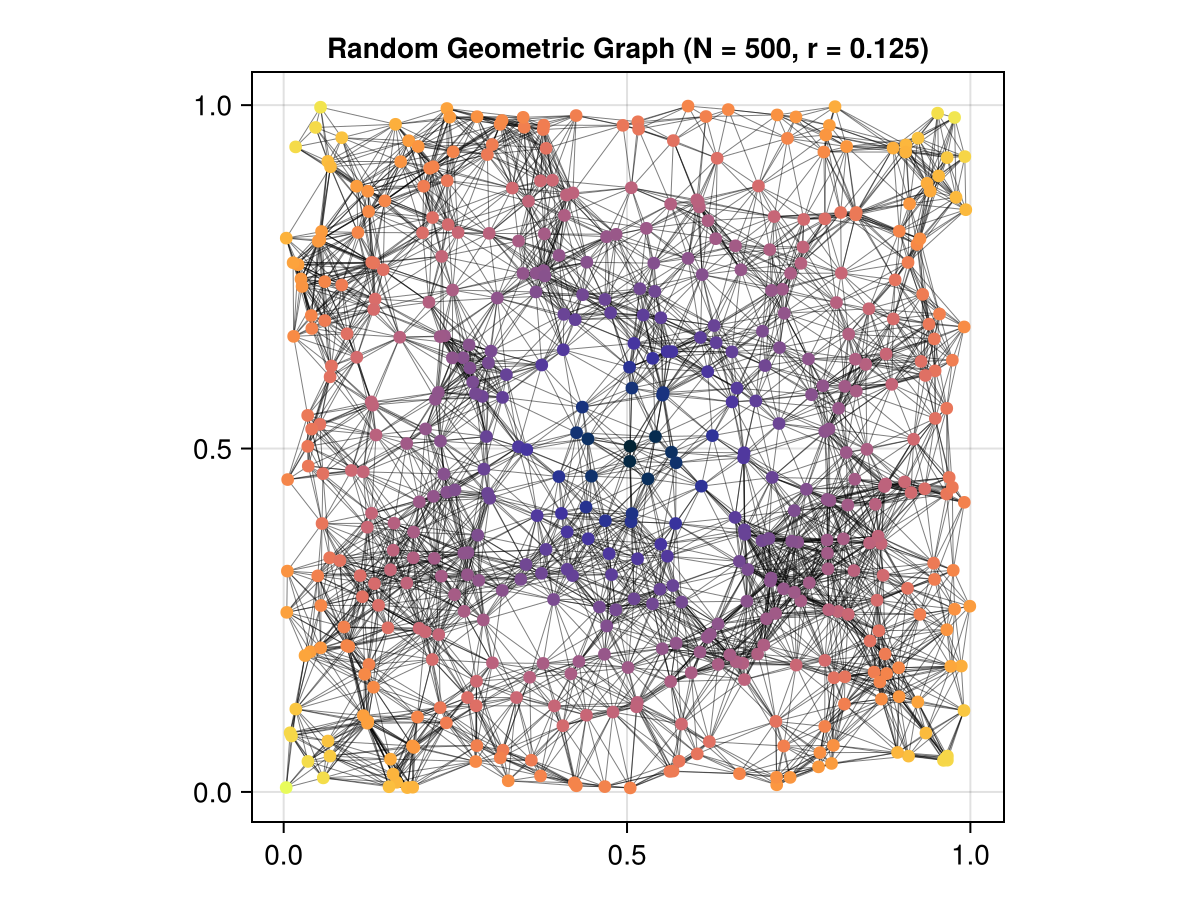

In [7]:
plot2 = plot_graph(500,0.125)

In [8]:
save("./../fig/RGG_2.png", plot2)

CairoMakie.Screen{IMAGE}
